<!--HEADER-->
*Notas de aula de Modelagem Matemática - 2020/2 [- Ricardo M. S. Rosa (IM/UFRJ)](http://www.im.ufrj.br/rrosa)*

<!--BADGES-->
<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2020p2/notas_de_aula/08.00-Modelos_redutiveis_linear_aplicacoes.ipynb" target="_blank"><img align="left" src="https://img.shields.io/badge/view%20in-nbviewer-orange" alt="View in NBViewer" title="View in NBViewer"></a><a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/julia-env-for-binder?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Frmsrosa%252Fmodelagem_matematica%26branch%3Dmodmat2020p2%26urlpath%3Dtree%252Fmodelagem_matematica%252Fnotas_de_aula/08.00-Modelos_redutiveis_linear_aplicacoes.ipynb" target="_blank"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open in binder"></a><a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2020p2/notas_de_aula/slides/08.00-Modelos_redutiveis_linear_aplicacoes.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/view-slides-darkgreen" alt="View Slides" title="View Slides"></a>&nbsp;

<!--NAVIGATOR-->
[<- 7. Mínimos quadrados e o ajuste de parâmetros](07.00-Minimos_quadrados_ajuste.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [9. Mínimos quadrados não-linear ->](09.00-Minimos_quadrados_nao_linear.ipynb)

---


# Modelos redutíveis ao caso linear nos parâmetros e aplicações

* Certos modelos não-lineares nos parâmetros podem ser reduzidos ao caso linear, de modo a permitir o uso do método de mínimos quadrados
* Exemplos:
  * $y = \beta_0 e^{\beta_1 x}$;
  * $y = \beta_0 x^{\beta_1}$;
  * $y = \frac{\beta_0 x}{\beta_1 + x}$.

In [1]:
using CSV
using Dates
using Plots

## Modelo exponencial

* Modelo $y = \beta_0 e^{\beta_1 x}$.

* Esse modelo pode ser transformado em uma expressão linear nos parâmetros $\beta_0$, $\beta_1$ usando-se coordenadas logarítmicas na ordenada.

* Aplicando o logarítmo nos dois lados da equação, obtemos
$$ \ln y = \ln \beta_0 e^{\beta_1 x} = \ln \beta_0 + \ln e^{\beta_1 x} = \ln\beta_0 + \beta_1 x.
$$

* Definindo
$$ \eta = \ln y, \qquad \tilde\beta_0 = \ln\beta_0,
$$
obtemos o modelo linear nos parâmetros
$$ \eta = \tilde\beta_0 + \beta_1 x.
$$

* Nesse caso, é preciso transformar os dados $(x_i, y_i)$ em
$$ (x_i, \eta_i) = (x_i, \ln y_i).
$$

## Modelo de potência

* Modelo $y = \beta_0 x^{\beta_1}$.

* Aplicando-se o logarítmo nos dois lados, obtemos, nesse caso,
$$ \ln y = \ln \beta_0 x^{\beta_1} = \ln\beta_0 + \ln x^{\beta_1} = \ln\beta_0 + \ln e^{\beta_1 \ln x} = \ln\beta_0 + \beta_1 \ln x.
$$

* Definindo
$$ \eta = \ln y, \quad \xi = \ln x, \quad \tilde\beta_0 = \ln\beta_0,
$$
chegamos no modelo
$$ \eta = \tilde\beta_0 + \beta_1 \xi_i
$$

* Nesse caso, é preciso transformar os dados $(x_i, y_i)$ em
$$ (\xi_i, \eta_i) = (\ln x_i, \ln y_i).
$$

## Modelo racional

* Modelo $y = \frac{\beta_0 x}{\beta_1 + x}$.

* Considerando a inversa multiplicativa de cada lado do modelos, escrevemos
$$ \frac{1}{y} = \frac{\beta_1 + x}{\beta_0 x} = \frac{\beta_1}{\beta_0 x} + \frac{1}{\beta_0}.
$$

* Definimos, então,
$$ \eta = \frac{1}{y}, \quad \xi = \frac{1}{x}, \quad \tilde\beta_0 = \frac{\beta_1}{\beta_0}, \quad \tilde\beta_1 = \frac{1}{\beta_0}.
$$

* Assim, chegamos no modelo
$$ \eta = \tilde\beta_0 + \tilde\beta_1 \xi.
$$

* Nesse caso, é preciso transformar os dados $(x_i, y_i)$ em
$$ (\xi_i, \eta_i) = \left(\frac{1}{x_i}, \frac{1}{y_i}\right).
$$

## Exemplo: salário e grau de instrução

* Como nosso primeiro exemplo, vamos comparar o salário anual médio com o grau de instrução.

* Dados dos EUA, obtidos de [US Bureau of Labor Statistics: Learn more, earn more: Education leads to higher wages, lower unemployment](https://www.bls.gov/careeroutlook/2020/data-on-display/education-pays.htm).

| Nível de instrução  | Média de salário semanal (USD\\$) | Taxa de desemprego (%)|
| ---                  | ---  | --- |
| Doutorado            | 1883 | 1,1 |
| Profissional         | 1861 | 1,6 |
| Mestrado             | 1497 | 2,0 |
| Graduação            | 1248 | 2,2 |
| Associado*            |  887 | 2,7 |
| Graduação incompleta |  833 | 3.3 |
| Ensino Médio         |  746 | 3,7 |
| Ensino Fundamental   |  592 | 5,4 |

* *Associado* é um grau conferido em algumas instituições de nível superior, em cursos de dois a três anos.

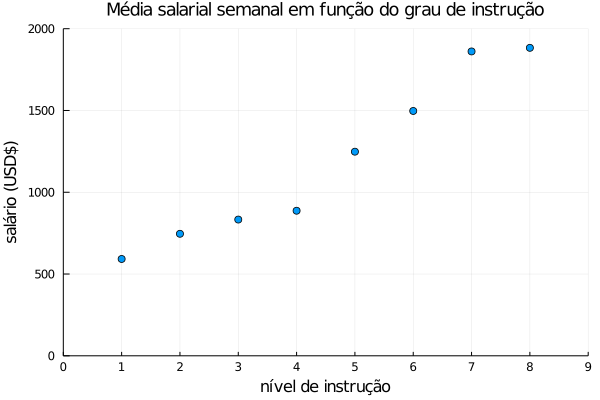

In [2]:
y = [592, 746, 833, 887, 1248, 1497, 1861, 1883]
plot(y, seriestype = :scatter, xlims=(0,9), ylims=(0,2000),
    xticks=0:9, xaxis = "nível de instrução", yaxis="salário (USD\$)", 
    title="Média salarial semanal em função do grau de instrução", 
    titlefont=12, legend=false)

* Queremos ajustar um modelo simples linear $y=\beta_0 + \beta_1 x$, onde $x$ representa o grau de instrução e $y$, o salário.

* O grau de instrução não tem uma escala muito bem definida como exibido acima, mas seguimos assim para efeitos ilustrativos, do método de mínimos quadrados.

* De qualquer forma, é nítida a relação entre as duas variáveis.

* Queremos, então, minimizar o erro quadrático $E=\sum_i |y_j - \beta_0 + \beta_1 x_j|^2$.

* Para isso, montamos a matrix de Vandermonde
$$ A = \left[ \begin{matrix} 1 & x_1 \\ 1 & x_2 \\ \ldots & \ldots \\ 1 & x_8 \end{matrix} \right] = \left[ \begin{matrix} 1 & 1 \\ 1 & 2 \\\ldots & \ldots \\ 1 & 8 \end{matrix} \right]
$$

* E minimizamos $E = \|\mathbf{y} - A\mathbf{x}\|^2$, onde
$$ \mathbf{x} = (x_i)_{i=1}^8 = (1,\ldots, 8) \quad \mathbf{y} = (y_i)_i = (592, 746, 833, 887, 1248, 1497, 1861, 1883).
$$

* Solucionamos isso em julia com o operador [`\`](https://github.com/JuliaLang/julia/blob/master/stdlib/LinearAlgebra/src/generic.jl#L1144).

* Antes, definimos a matrix $A$.

In [3]:
A = [1 1; 1 2; 1 3; 1 4; 1 5; 1 6; 1 7; 1 8]

8×2 Matrix{Int64}:
 1  1
 1  2
 1  3
 1  4
 1  5
 1  6
 1  7
 1  8

* Também podemos fazer isso de forma mais programática:

In [4]:
A = [ones(8) collect(1:8)]

8×2 Matrix{Float64}:
 1.0  1.0
 1.0  2.0
 1.0  3.0
 1.0  4.0
 1.0  5.0
 1.0  6.0
 1.0  7.0
 1.0  8.0

* O vetor $\mathbf{y}$ já foi definido acima, quando da exibição do gráfico.

* A solução do problema de mínimos quadrados é dada por `A\y`.

In [5]:
x = A\y

2-element Vector{Float64}:
 284.53571428571445
 201.9642857142857

* Isso nos dá $\beta_0=284.54$ e $\beta_1=201.96$.

* E a visualização do modelo ajustado.

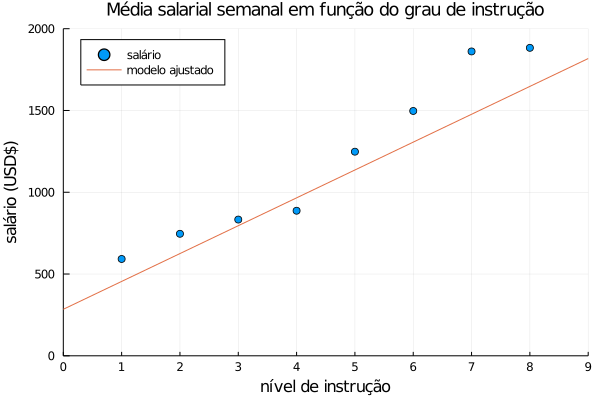

In [6]:
y = [592, 746, 833, 887, 1248, 1497, 1861, 1883]
plot(y, seriestype = :scatter, xlims=(0,9), ylims=(0,2000),
    xticks=0:9, xaxis = "nível de instrução", yaxis="salário (USD\$)", 
    label="salário", title="Média salarial semanal em função do grau de instrução", 
    titlefont=12, legend=:topleft)
plot!([(0,x[1]), (9,x[2]*9)], label="modelo ajustado")

## O operador `\`

* Em Julia, o operador `\` funciona de maneira diferente de acordo com o tipo de matriz (um polialgoritmo).

* Se $A$ for uma matriz quadrada, é feita uma decomposição $LU$ (como um produto de uma matriz triangular inferior e uma superior).

* Se $A$ for retangular, é feita uma decomposição $QR$.

* Este não é um curso de computação científica, mas, para os interessados, é possível, no Julia, ver facilmente a implementação de uma operador.

* Podemos ver onde fica o código fonte para uma expressão `expr` com o comando `@which expr`. 

In [7]:
@which A\y

\(A::AbstractMatrix{T} where T, B::AbstractVecOrMat{T} where T) in LinearAlgebra at /Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6/LinearAlgebra/src/generic.jl:1122

* A localização é em relação à instalação local do Julia.

* Os códigos de todos os pacotes do Julia, no entanto, estão todos disponíveis no github e são praticamente todos escritos na própria linguagem julia.

* No caso acima, a expressão `A\b` está no pacote padrão `LinearAlgebra`, no aquivo `generic.jl`, na linha 1122.

* Esse pacote está disponível em [github.com/JuliaLang/julia/stdlib/LinearAlgebra](https://github.com/JuliaLang/julia/tree/master/stdlib/LinearAlgebra), e o arquivo, em [generic.jl](https://github.com/JuliaLang/julia/blob/master/stdlib/LinearAlgebra/src/generic.jl).

* A linha exata pode variar um pouco do listado pelo comando `@which`, pois o código já pode ter tido modificações depois da instalação local (que por sua vez também pode ser atualizada).

* No caso acima, o link exato é [generic.jl#L1125](https://github.com/JuliaLang/julia/blob/master/stdlib/LinearAlgebra/src/generic.jl#L1125)

## A tilápia do Nilo

* Lembremos dos seguintes dados da *Tilápia-do-nilo* criada em cativeiro (fonte: 
[T. S. de Castro Silva, L. D. dos Santos, L. C. R. da Silva, M. Michelato, V. R. B. Furuya, W. M. Furuya, Length-weight relationship and prediction equations of body composition for growing-finishing cage-farmed Nile tilapia, R. Bras. Zootec. vol.44 no.4 Viçosa Apr. 2015](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S1516-35982015000400133)):

| Days of culture | 1 | 20 | 40 | 60 | 80 | 100 |
| --- | --- | --- | --- | --- | --- | --- |
| Massa (g) | 28.6±4.2 | 88.6±1.4 | 177.6±3.6 | 313.8±12.8 | 423.7±12.7 | 774.4±23.6 |
| Comprimento (cm) | 10.9±0.4 | 15.3±0.4 | 19.1±0.2 | 22.8±0.5 | 26.3±0.6 | 31.3±0.4 |

* Busquemos ajustar uma lei de potência (equação alométrica) $y=\beta_0 x^{\beta_1}$ aos dados, onde $y$ é a massa e $x$, o comprimento.

* No momento, vamos apenas considerar os valores médios.

* Começamos construímos os vetores com os dados.

In [8]:
x = [10.9, 15.3, 19.1, 22.8, 26.3, 31.3]
y = [28.6, 88.6, 177.6, 313.8, 423.7, 774.4]
@show x'
@show y'

x' = [10.9 15.3 19.1 22.8 26.3 31.3]
y' = [28.6 88.6 177.6 313.8 423.7 774.4]


1×6 adjoint(::Vector{Float64}) with eltype Float64:
 28.6  88.6  177.6  313.8  423.7  774.4

* E lembremos que o problema deve ser reformulado como $\ln y = \ln\beta_0 + \beta_1\ln x$

* Assim, devemos considerar $\xi = \ln x$ e $\eta = \ln y$ e a matriz de Vandermonde correspondente.

* Na verdade, só faz sentido considerarmos logarítmos e exponenciais de quantidades adimensionais.

* Assim, devemos considerar, a versão adimensionalizada dos dados, o que é exatamente o que estamos fazendo, já que os vetores `x` e `y` não tem unidades.

* Eles já foram convertidos implicitamente em quantidades adimensionais quando não incluímos as unidades em suas construções.

* Para todos os efeitos, estamos considerando 
$$ x=\frac{\text{comprimento em } \texttt{cm}}{1\,\texttt{cm}}, \qquad y = \frac{\text{comprimento em } \texttt{cm}}{1\,\texttt{cm}}
$$

* Construímos, então

In [9]:
ξ = log.(x)

6-element Vector{Float64}:
 2.388762789235098
 2.72785282839839
 2.9496883350525844
 3.126760535960395
 3.269568939183719
 3.4436180975461075

In [10]:
η = log.(y)

6-element Vector{Float64}:
 3.353406717825807
 4.484131857611035
 5.17953383055807
 5.748755840298932
 6.049025657632513
 6.652088535962367

In [11]:
A = [ones(length(ξ)) ξ]

6×2 Matrix{Float64}:
 1.0  2.38876
 1.0  2.72785
 1.0  2.94969
 1.0  3.12676
 1.0  3.26957
 1.0  3.44362

* Agora resolvemos o problema de mínimos quadrados:

In [12]:
β̃ = A\η

2-element Vector{Float64}:
 -3.9870885208722124
  3.093303670320135

* Estes são os valores de $\tilde\beta_0 = \ln\beta_0$ e $\beta_1$, respectivamente. Assim, $\beta_0 = e^{\tilde\beta_0}$.

In [13]:
β₀, β₁ = exp(β̃[1]), β̃[2]

(0.018553654135861745, 3.093303670320135)

* Com os parâmetros encontrados, podemos fazer as visualizações, tanto na formulação transformada, quanto na original.

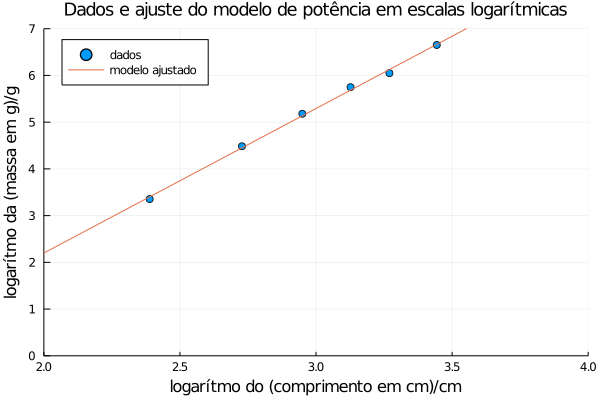

In [14]:
plot(ξ, η, seriestype = :scatter, xlims=(2,4), ylims=(0,7), xticks=2:0.5:4,
    xaxis = "logarítmo do (comprimento em cm)/cm", yaxis="logarítmo da (massa em g)/g",
    label="dados", title="Dados e ajuste do modelo de potência em escalas logarítmicas", 
    titlefont=12, legend=:topleft)
plot!([(2, β̃[1] + β̃[2]*2), (4,β̃[1] + β̃[2]*4)], label="modelo ajustado")

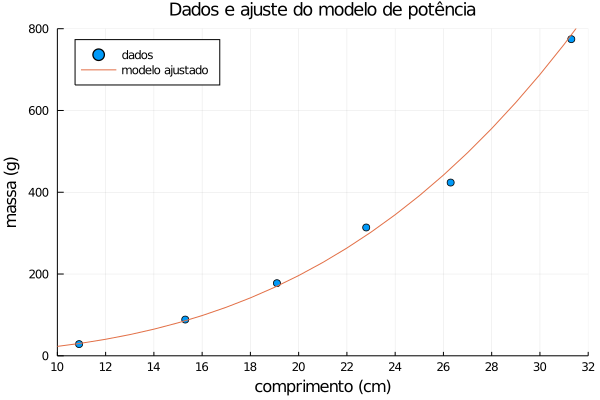

In [15]:
plot(x, y, seriestype = :scatter, xlims=(10,32), ylims=(0,800), xticks=10:2:32,
    xaxis = "comprimento (cm)", yaxis="massa (g)",
    label="dados", title="Dados e ajuste do modelo de potência", 
    titlefont=12, legend=:topleft)
plot!(10:32, β₀*(10:32).^β₁, label="modelo ajustado")

## Decaimento radioativo do Plutônio-241

* Neste outro exemplo, vamos examinar o decaimento radioativo do Plutônio-241, que é um dos muitos isótopos do [Plutônio](https://en.wikipedia.org/wiki/Plutonium).

* O isótopo mais importante, utilizado na geração de energia em reatores nucleares (e também em bombas atômicas) é o Plutônio-239.

* Essa importância é devidade à *fissibilidade* desse isótopo, que é a capacidade dos seus núcleos de se quebrarem (i.e. sofrerem uma fissão) quando atingidos por um neutron em movimento "lento" e assim liberem energia suficiente para sustentar uma reação em cadeia, fissionando outros núcleos do mesmo elemento.

* O isótopo 241 também tem uma alta capacidade de fissibilidade, mas ele sofre de um alto risco de fissibilidade espontânea, quando acima de uma massa crítica, e assim limitando o seu uso.

* Um outro problema do isótopo 241 é a sua meia-vida relativamente curta (cerca de 14.3 anos, curta comparada com a de dezenas de milhares de anos dos isótopos 239 e 240), dificultando o cálculo da massa de um material composto de diferentes isótopos de plutônio, que é o que se obtém na prática. 

* O decaimento da massa $x$ de um elemento radioativo (puro) já está bem estabelecido como sendo exponencial: $x = Ce^{-\lambda t}$, onde $C=x(0)$ é a massa inicial e $\lambda$ é a taxa de decaimento específico:
$$ \frac{\text{d} x}{\text{d} t} = - \lambda x.
$$

* A taxa de decaimento está diretamente ligada à meia-vida $\tau_{1/2}$ pela relação
$$ Ce^{-\lambda \tau_{1/2}} = \frac{C}{2} \quad \Longleftrightarrow \quad \tau_{1/2} = \frac{\ln(2)}{\lambda}.
$$

* Cada isótopo tem a sua taxa de decaimento.

* Na análise a seguir, vamos considerar os isótopos 239, 240 e 241 e designar as suas taxas de decaimento e as suas meia-vidas por $\lambda_{239}, \lambda_{240}, \lambda_{241}$ e $\tau_{1/2}({}^{239}\texttt{Pu}), \tau_{1/2}({}^{240}\texttt{Pu}), \tau_{1/2}({}^{241}\texttt{Pu})$, respectivamente.

* Vamos utilizar o método e parte dos dados conforme descritos no artigo
R. Wellum, A. Verbruggen e R. Kessel, "A new evaluation of the half-life of ${}^{241}\texttt{Pu}$", *J. Anal. At. Spectrom.* **24** (2009), 801–807.

* No artigo, os autores analisam a fração de frações dos isótopos:
$$ r = \frac{\frac{\displaystyle n({}^{241}\texttt{Pu})}{\displaystyle n({}^{240}\texttt{Pu})}}{\frac{\displaystyle n({}^{240}\texttt{Pu})}{\displaystyle n({}^{239}\texttt{Pu})}},
$$

* Cada $n({}^{k}\texttt{Pu})$, $k=239, 240, 241$, indica o número de cada [nuclídeo](https://pt.wikipedia.org/wiki/Nucl%C3%ADdeo) na amostra.

* Essa técnica de se calcular a fração de frações tem por objetivo eliminar certos efeitos tendenciosos presentes no cálculo da massa por métodos diretos.

* Vamos fazer o ajuste do decaimento exponencial de $r$.

* Mas qual a relação desse decaimento com o de cada isótopo?

* Seja $x_k= n({}^{k}\texttt{Pu})$, $k=239, 240, 241$, para simplificar.

* Sejam $p$ e $\lambda_k$ as taxas de decaimento de $r$ e de cada $x_k$, respectivamente.

* Então
$$ \ln r = \ln\left(\frac{\frac{x_{241}}{x_{240}}}{\frac{x_{240}}{x_{239}}}\right) = \ln x_{241} + \ln x_{239} - 2\ln x_{240}
$$
e
$$\frac{\text{d} \ln r}{\text{d} t} = \frac{\dot r}{r} = p, \qquad \frac{\text{d} \ln x_k}{\text{d} t} = \frac{\dot x_k}{x_k} = \lambda_k
$$
* Com isso,
$$ p = \lambda_{241} + \lambda_{239} - 2\lambda_{240}.
$$

* Por terem uma meia-vida bem mais longa, os valores de $\lambda_{239}$ e $\lambda_{240}$ já estavam mais bem estabelecidas e eram mais confiáveis.

* O objetivo, então, era obter uma estimativa mas precisa para $\lambda_{241}$, com base nos valores conhecidos de $\lambda_{239}$ e $\lambda_{240}$ e no valor a ser calculado de $p$, a partir dos dados.

* Os dados foram colhidos a partir do decaimento de uma determinada amostra de material, ao longo de dezenas de anos.

* Colocamos os dados no arquivo `dados/decaimento_plutonio241.csv`.

* Podemos ler o arquivo com o comando `readlines`, mas observe que nesse caso cada linha aparece como uma *string* em um vetor. Podemos trabalhar cada linha para extrair os dados de maneira apropriada.

In [16]:
println(readlines(joinpath("data", "decaimento_plutonio241.csv")))

["Data(ano/mês/dia),Fração das frações", "1976-01-13,6.5066", "1976-01-19,6.4965", "1976-09-27,6.2857", "1976-10-04,6.282", "1977-03-08,6.1526", "1977-03-22,6.1435", "1977-11-23,5.9406", "1978-12-05,5.6599", "1981-06-02,5.0133", "1993-12-13,2.7387", "1994-08-25,2.6498", "1996-10-28,2.38517", "2006-11-13,1.47161"]


In [17]:
for (i,l) in enumerate(eachline(joinpath("data", "decaimento_plutonio241.csv")))
    a, b = split(l, ',')
    if i == 1
        println("$a\t$b")
    else
        println("$a\t\t$(parse(Float64, b))")
    end
end

Data(ano/mês/dia)	Fração das frações
1976-01-13		6.5066
1976-01-19		6.4965
1976-09-27		6.2857
1976-10-04		6.282
1977-03-08		6.1526
1977-03-22		6.1435
1977-11-23		5.9406
1978-12-05		5.6599
1981-06-02		5.0133
1993-12-13		2.7387
1994-08-25		2.6498
1996-10-28		2.38517
2006-11-13		1.47161


* Ou, ainda podemos ler com o pacote [CSV.jl](https://csv.juliadata.org/stable/).

* Outra opção é com o [DataFrames.jl](https://dataframes.juliadata.org/stable/), mas vamos deixar esse para outra oportunidade.

In [18]:
csv_data = CSV.File(joinpath("data", "decaimento_plutonio241.csv"))

13-element CSV.File{false}:
 CSV.Row: (Data(ano/mês/dia) = Date("1976-01-13"), Fração das frações = 6.5066)
 CSV.Row: (Data(ano/mês/dia) = Date("1976-01-19"), Fração das frações = 6.4965)
 CSV.Row: (Data(ano/mês/dia) = Date("1976-09-27"), Fração das frações = 6.2857)
 CSV.Row: (Data(ano/mês/dia) = Date("1976-10-04"), Fração das frações = 6.282)
 CSV.Row: (Data(ano/mês/dia) = Date("1977-03-08"), Fração das frações = 6.1526)
 CSV.Row: (Data(ano/mês/dia) = Date("1977-03-22"), Fração das frações = 6.1435)
 CSV.Row: (Data(ano/mês/dia) = Date("1977-11-23"), Fração das frações = 5.9406)
 CSV.Row: (Data(ano/mês/dia) = Date("1978-12-05"), Fração das frações = 5.6599)
 CSV.Row: (Data(ano/mês/dia) = Date("1981-06-02"), Fração das frações = 5.0133)
 CSV.Row: (Data(ano/mês/dia) = Date("1993-12-13"), Fração das frações = 2.7387)
 CSV.Row: (Data(ano/mês/dia) = Date("1994-08-25"), Fração das frações = 2.6498)
 CSV.Row: (Data(ano/mês/dia) = Date("1996-10-28"), Fração das frações = 2.38517)
 CSV.Row: (D

* Agora extraímos cada coluna de dados

In [19]:
data = [csv_data[j][1] for j in 1:length(csv_data)]

13-element Vector{Date}:
 1976-01-13
 1976-01-19
 1976-09-27
 1976-10-04
 1977-03-08
 1977-03-22
 1977-11-23
 1978-12-05
 1981-06-02
 1993-12-13
 1994-08-25
 1996-10-28
 2006-11-13

In [20]:
r = [csv_data[j][2] for j in 1:length(csv_data)]

13-element Vector{Float64}:
 6.5066
 6.4965
 6.2857
 6.282
 6.1526
 6.1435
 5.9406
 5.6599
 5.0133
 2.7387
 2.6498
 2.38517
 1.47161

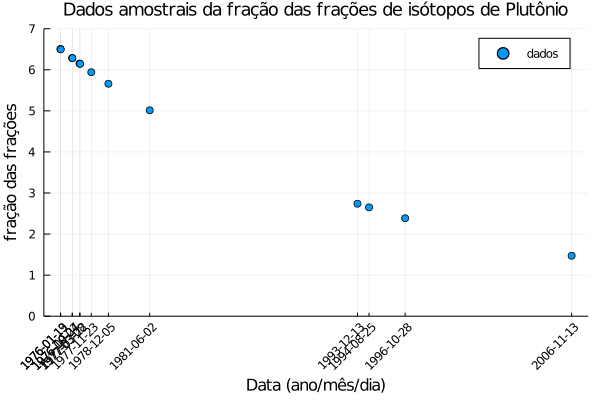

In [21]:
plot(data, r, seriestype = :scatter, xlims=(data[1]-Dates.Year(1), data[end]+Dates.Year(1)), ylims=(0,7), xticks=data,
    xaxis = "Data (ano/mês/dia)", yaxis="fração das frações", xrotation=45,
    label="dados", title="Dados amostrais da fração das frações de isótopos de Plutônio", 
    titlefont=12, legend=:topright)

* Para fazer o ajuste, transformamos a data em anos decorridos desde o dia da primeira amostragem.

* Em seguida, visualizamos os dados em escala logarítmica.

* Em escala logarítmica, podemos facilmente visualizar uma reta aproximando bem os dados, validando o modelo.

* Mas vamos quantificar isso.

In [22]:
t = (Dates.date2epochdays.(data) .- Dates.date2epochdays(data[1]) .+ 1)./365.25

13-element Vector{Float64}:
  0.0027378507871321013
  0.019164955509924708
  0.7091033538672142
  0.7282683093771389
  1.1526351813826146
  1.1909650924024642
  1.864476386036961
  2.8966461327857633
  5.388090349075975
 17.919233401779604
 18.61738535249829
 20.79397672826831
 30.836413415468858

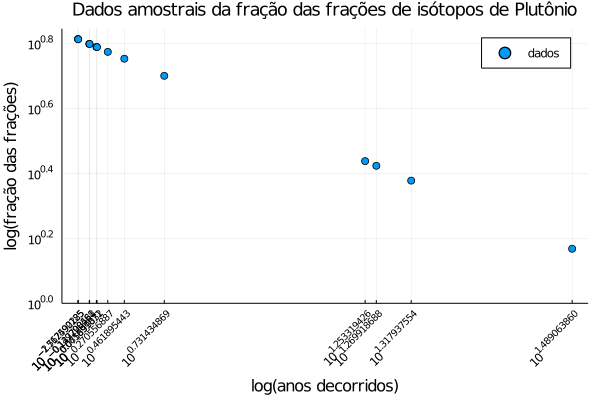

In [23]:
plot(t, r, seriestype = :scatter, xlims=(t[1]-1, t[end]+1), ylims=(1,7), xticks=t,
    xaxis = ("log(anos decorridos)", :log10), yaxis=("log(fração das frações)", :log10), xrotation=45,
    label="dados", title="Dados amostrais da fração das frações de isótopos de Plutônio", 
    titlefont=12, legend=:topright)

### Ajuste

* Transformamos os dados para a escala adequada.

* Montamos a matriz de Vandermonde.

* Resolvemos o problema de mínimos quadrados.

* Exibimos o ajuste.

In [24]:
ρ = log.(r)
A = [ones(length(t)) t]

13×2 Matrix{Float64}:
 1.0   0.00273785
 1.0   0.019165
 1.0   0.709103
 1.0   0.728268
 1.0   1.15264
 1.0   1.19097
 1.0   1.86448
 1.0   2.89665
 1.0   5.38809
 1.0  17.9192
 1.0  18.6174
 1.0  20.794
 1.0  30.8364

In [25]:
β̃ = A\ρ
C = exp(β̃[1])
p = -β̃[2]
@show C, p
nothing

(C, p) = (6.504114523362512, 0.048222454056244105)


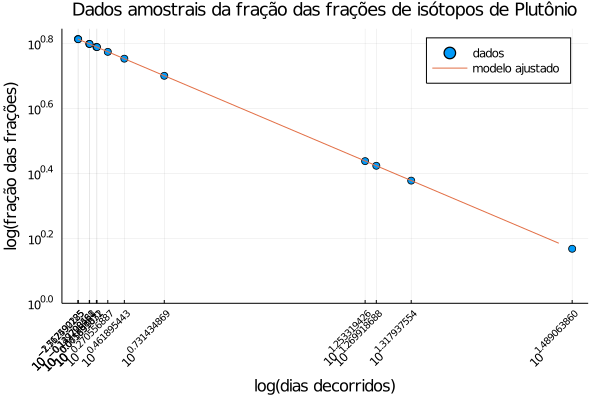

In [26]:
plot(t, r, seriestype = :scatter, xlims=(t[1]-1, t[end]+1), ylims=(1,7), xticks=t,
    xaxis = ("log(dias decorridos)", :log10), yaxis=("log(fração das frações)", :log10), xrotation=45,
    label="dados", title="Dados amostrais da fração das frações de isótopos de Plutônio", 
    titlefont=12, legend=:topright)
tt = t[1]:10:t[end]
plot!(tt, C*exp.(-p*tt), xaxis=:log10, yaxis=:log10, label="modelo ajustado")

* De volta às coordenadas originais

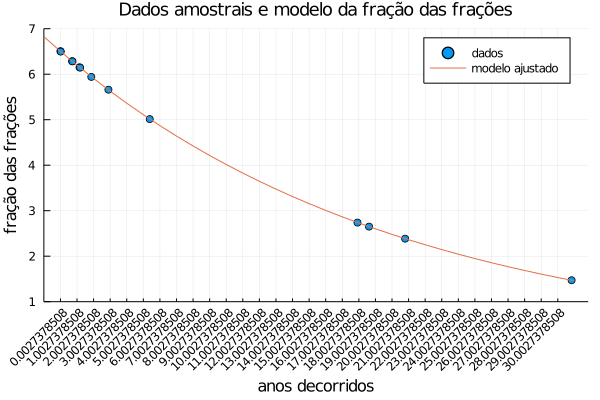

In [27]:
plot(t, r, seriestype = :scatter, xlims=(t[1]-1, t[end]+1), ylims=(1,7), xticks=t[1]:t[end],
    xaxis = "anos decorridos", yaxis="fração das frações", xrotation=45,
    label="dados", title="Dados amostrais e modelo da fração das frações", 
    titlefont=12, legend=:topright)
tt = t[1]-1:1:t[end]+1
plot!(tt, C*exp.(-p*tt), label="modelo ajustado")

## Meia-vida do Plutônio-241

* A meia-vida do Plutônio-239 é tomada como sendo de 24110 anos.

* A meia-vida do Plutônio-240 é tomada como sendo de 6563 anos.

* O ajuste nos deu $p \approx 0.0482$.

* Isso nos dá $\lambda_{241} \approx -0.48$ e uma meia-vida de
$$ \tau_{1/2}({}^{241}\texttt{Pu}) \approx 14.32 \text{ anos.}
$$

In [28]:
λ_239 = log(2)/24110
λ_240 = log(2)/6563
λ = p +2λ_240 - λ_239
τ_meia = log(2)/λ

14.319763113242617

## Exercícios

1. Transforme o modelo $y = \frac{\beta_0}{\beta_1 + x}$ em uma expressão que seja linear nos parâmetros.

1. O modelo bidimensional $z=\beta_0 x^{\beta_1} y^{\beta_2}$ pode ser transformado em uma expressão linear do tipo $\zeta = \tilde\beta_0 + \tilde\beta_1\xi + \tilde\beta_2 \eta$, para variáveis e parâmetros apropriados. Use isso para ajustar os parâmetros $\beta_0$, $\beta_1$, $\beta_2$ para que o modelo original em $z$ melhor aproxime os dados da seguinte tabela.
|  x  |  y  |  z   |
| --- | --- | ---  |
|  1  |  1  | 0.82 |
|  1  |  2  | 1.72 |
|  1  |  3  | 2.85 |
|  2  |  1  | 1.01 |
|  2  |  2  | 2.44 |
|  2  |  3  | 3.95 |
|  3  |  1  | 1.38 |
|  3  |  2  | 3.07 |
|  3  |  3  | 4.86 |

1. Faço o ajuste de um modelo linear aos dados de taxa de desemprego em relação ao grau de instrução, exibidos no texto, obtidos da fonte [US Bureau of Labor Statistics: Learn more, earn more: Education leads to higher wages, lower unemployment](https://www.bls.gov/careeroutlook/2020/data-on-display/education-pays.htm).

1. Buscar os dados de salário e nível de instrução e buscar um modelo representando a relação entre os dois.

1. Em certos processos químicos ou bioquímicos envolvendo catalisadores ou enzimas, da forma $E + S \rightleftharpoons ES \rightarrow E + P$, a taxa $\nu$ de reação da concentração $S$ de um reagente (substrato) é comumente modelada pela relação (modelo de Michaelis-Menten)
$$ \nu = \frac{\displaystyle \nu_m S}{\displaystyle K_M + S}, 
$$
onde $\nu_m>0$ é a a taxa máxima de reação (associada a uma concentração muito alta do substrato) e $K_M>0$ é um parâmetro de (semi)saturação. Usando os dados do arquivo `dados/reacao_enzimatica_figado_porco.csv`, da ação de uma enzima presente no fígado de porcos, faça um ajuste aos dados com a curva do tipo acima, encontrando valores para $\nu_m$ e $K_M$.

1. O arquivo `dados/evolucao_isotopos_plutonio.csv` contém uma outra tabela com a evolução das frações de alguns isótopos de Plutônio 241. Use esses dados para fazer o ajuste exponencial e calcular a meia-vida do isótopo 241.

<!--NAVIGATOR-->

---
[<- 7. Mínimos quadrados e o ajuste de parâmetros](07.00-Minimos_quadrados_ajuste.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [9. Mínimos quadrados não-linear ->](09.00-Minimos_quadrados_nao_linear.ipynb)